# Load the Dataset

Import a library like pandas to load the dataset from the CSV file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

# Explore the Data:

1.   List item
2.   List item




* Display the first few rows of the dataset.
* Display the size of data.
* Calculate basic statistics of the features.

In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
n = len (data)
n

100000

In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# This code will calculate the mean for numerical data, separately for the groups in your 'diabetes' column.
selected_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
mean_values_selected_columns = data.groupby('diabetes')[selected_columns].mean()
print(mean_values_selected_columns)


                age  hypertension  heart_disease        bmi  HbA1c_level  \
diabetes                                                                   
0         40.115187      0.058984       0.029235  26.887163     5.396761   
1         60.946588      0.245647       0.149059  31.988382     6.934953   

          blood_glucose_level  
diabetes                       
0                  132.852470  
1                  194.094706  


# Data Preprocessing:
* Check for any missing values and data types.
* Map from the string values to integers in the 'smoking_history' and 'gender' columns using dictionaries.
* Check outlier with visualization method.

In [ ]:
# Define a dictionary with the mapping from the string values to integers
replacement_dict = {
    'No Info': 0,
    'never': 1,
    'not current': 2,
    'former': 3,
    'current': 4,
    'ever': 5
}


In [ ]:
data['smoking_history'] = data['smoking_history'].replace(replacement_dict)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,1,25.19,6.6,140,0
1,Female,54.0,0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,1,27.32,5.7,158,0
3,Female,36.0,0,0,4,23.45,5.0,155,0
4,Male,76.0,1,1,4,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,27.32,6.2,90,0
99996,Female,2.0,0,0,0,17.37,6.5,100,0
99997,Male,66.0,0,0,3,27.83,5.7,155,0
99998,Female,24.0,0,0,1,35.42,4.0,100,0


In [ ]:
# Define a dictionary with the mapping from the string values to integers
replacement_dict = {'Other': 0, 'Female': 1,'Male': 2}
data['gender'] = data['gender'].replace(replacement_dict)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,2,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,4,23.45,5.0,155,0
4,2,76.0,1,1,4,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,0,27.32,6.2,90,0
99996,1,2.0,0,0,0,17.37,6.5,100,0
99997,2,66.0,0,0,3,27.83,5.7,155,0
99998,1,24.0,0,0,1,35.42,4.0,100,0


* Checking the dataset information post-mapping to ensure changes are reflected.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [ ]:
# Select specific numerical columns
selected_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


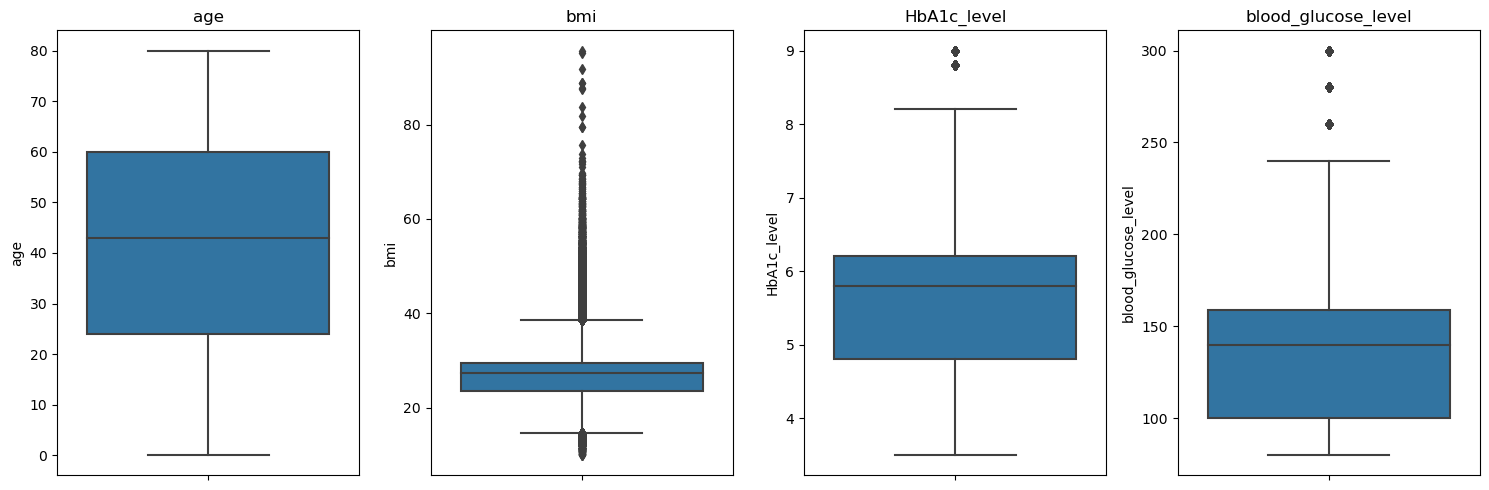

In [ ]:
# Plotting boxplots for the selected numerical columns
plt.figure(figsize=(15, 5))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(1, len(selected_columns), i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


* check the number of outlier in bmi

In [ ]:
len(data[data['bmi']>40])

4593

In [ ]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.414120,41.885856,0.07485,0.039420,1.332090,27.320767,5.527507,138.058060,0.085000
std,0.492937,22.516840,0.26315,0.194593,1.470656,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,1.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


* Real Extreme Values: In many cases, especially in medical datasets, outliers can be real, valid observations representing individuals with extreme values. For instance, very high or low BMI values might be clinically significant and important for understanding health risks.

# Data Normalization:

* Normalize the data for handeling the outlier to improve the visualization.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the columns to be normalized
columns_to_normalize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Creating a copy of the data for normalization purposes
data_normalized = data.copy()

In [ ]:
# Min-Max Normalization
min_max_scaler = MinMaxScaler()
data_normalized[columns_to_normalize] = min_max_scaler.fit_transform(data[columns_to_normalize])

In [ ]:
# Display the first few rows of the normalized data for Min-Max Normalization
data_normalized_min_max = data_normalized.head()

NameError: name 'df_normalized' is not defined

In [ ]:
data_normalized

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,1.000000,0,1,1,0.177171,0.563636,0.272727,0
1,1,0.674675,0,0,0,0.202031,0.563636,0.000000,0
2,2,0.349349,0,0,1,0.202031,0.400000,0.354545,0
3,1,0.449449,0,0,4,0.156863,0.272727,0.340909,0
4,2,0.949950,1,1,4,0.118231,0.236364,0.340909,0
...,...,...,...,...,...,...,...,...,...
99995,1,1.000000,0,0,0,0.202031,0.490909,0.045455,0
99996,1,0.024024,0,0,0,0.085901,0.545455,0.090909,0
99997,2,0.824825,0,0,3,0.207983,0.400000,0.340909,0
99998,1,0.299299,0,0,1,0.296569,0.090909,0.090909,0


In [ ]:
data_normalized.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.414120,0.523096,0.07485,0.039420,1.332090,0.202040,0.368638,0.263900,0.085000
std,0.492937,0.281742,0.26315,0.194593,1.470656,0.077460,0.194668,0.185037,0.278883
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.299299,0.00000,0.000000,0.000000,0.158964,0.236364,0.090909,0.000000
50%,1.000000,0.537037,0.00000,0.000000,1.000000,0.202031,0.418182,0.272727,0.000000
75%,2.000000,0.749750,0.00000,0.000000,2.000000,0.228408,0.490909,0.359091,0.000000
max,2.000000,1.000000,1.00000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Selecting specific numerical columns
selected_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

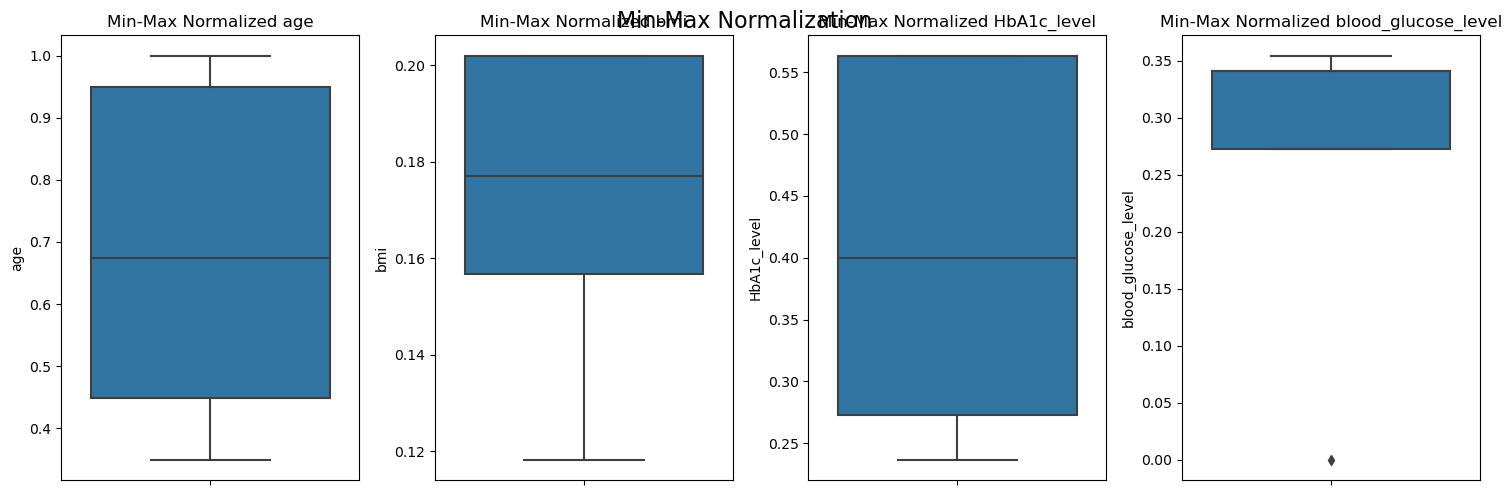

In [ ]:
# Plotting boxplots for the normalized columns using Min-Max Normalization
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_normalize, 1):
    plt.subplot(1, len(columns_to_normalize), i)
    sns.boxplot(y=data_normalized_min_max[column])
    plt.title(f'Min-Max Normalized {column}')

plt.tight_layout()
plt.suptitle('Min-Max Normalization', fontsize=16)
plt.show()

# Data Visualization:

<Axes: xlabel='diabetes', ylabel='count'>

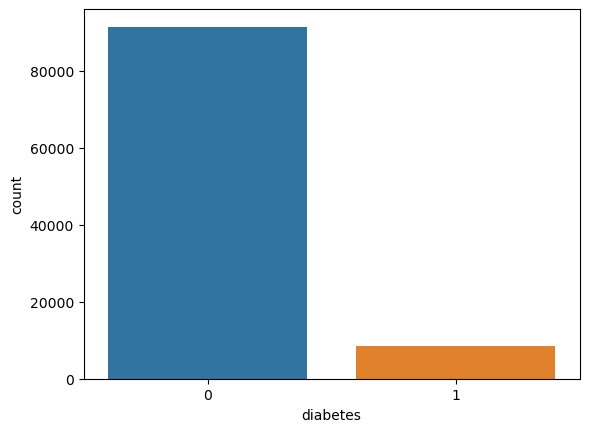

In [ ]:
#visualize the distribution of the 'diabetes' variable
sns.countplot(x = 'diabetes',data = data_normalized)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


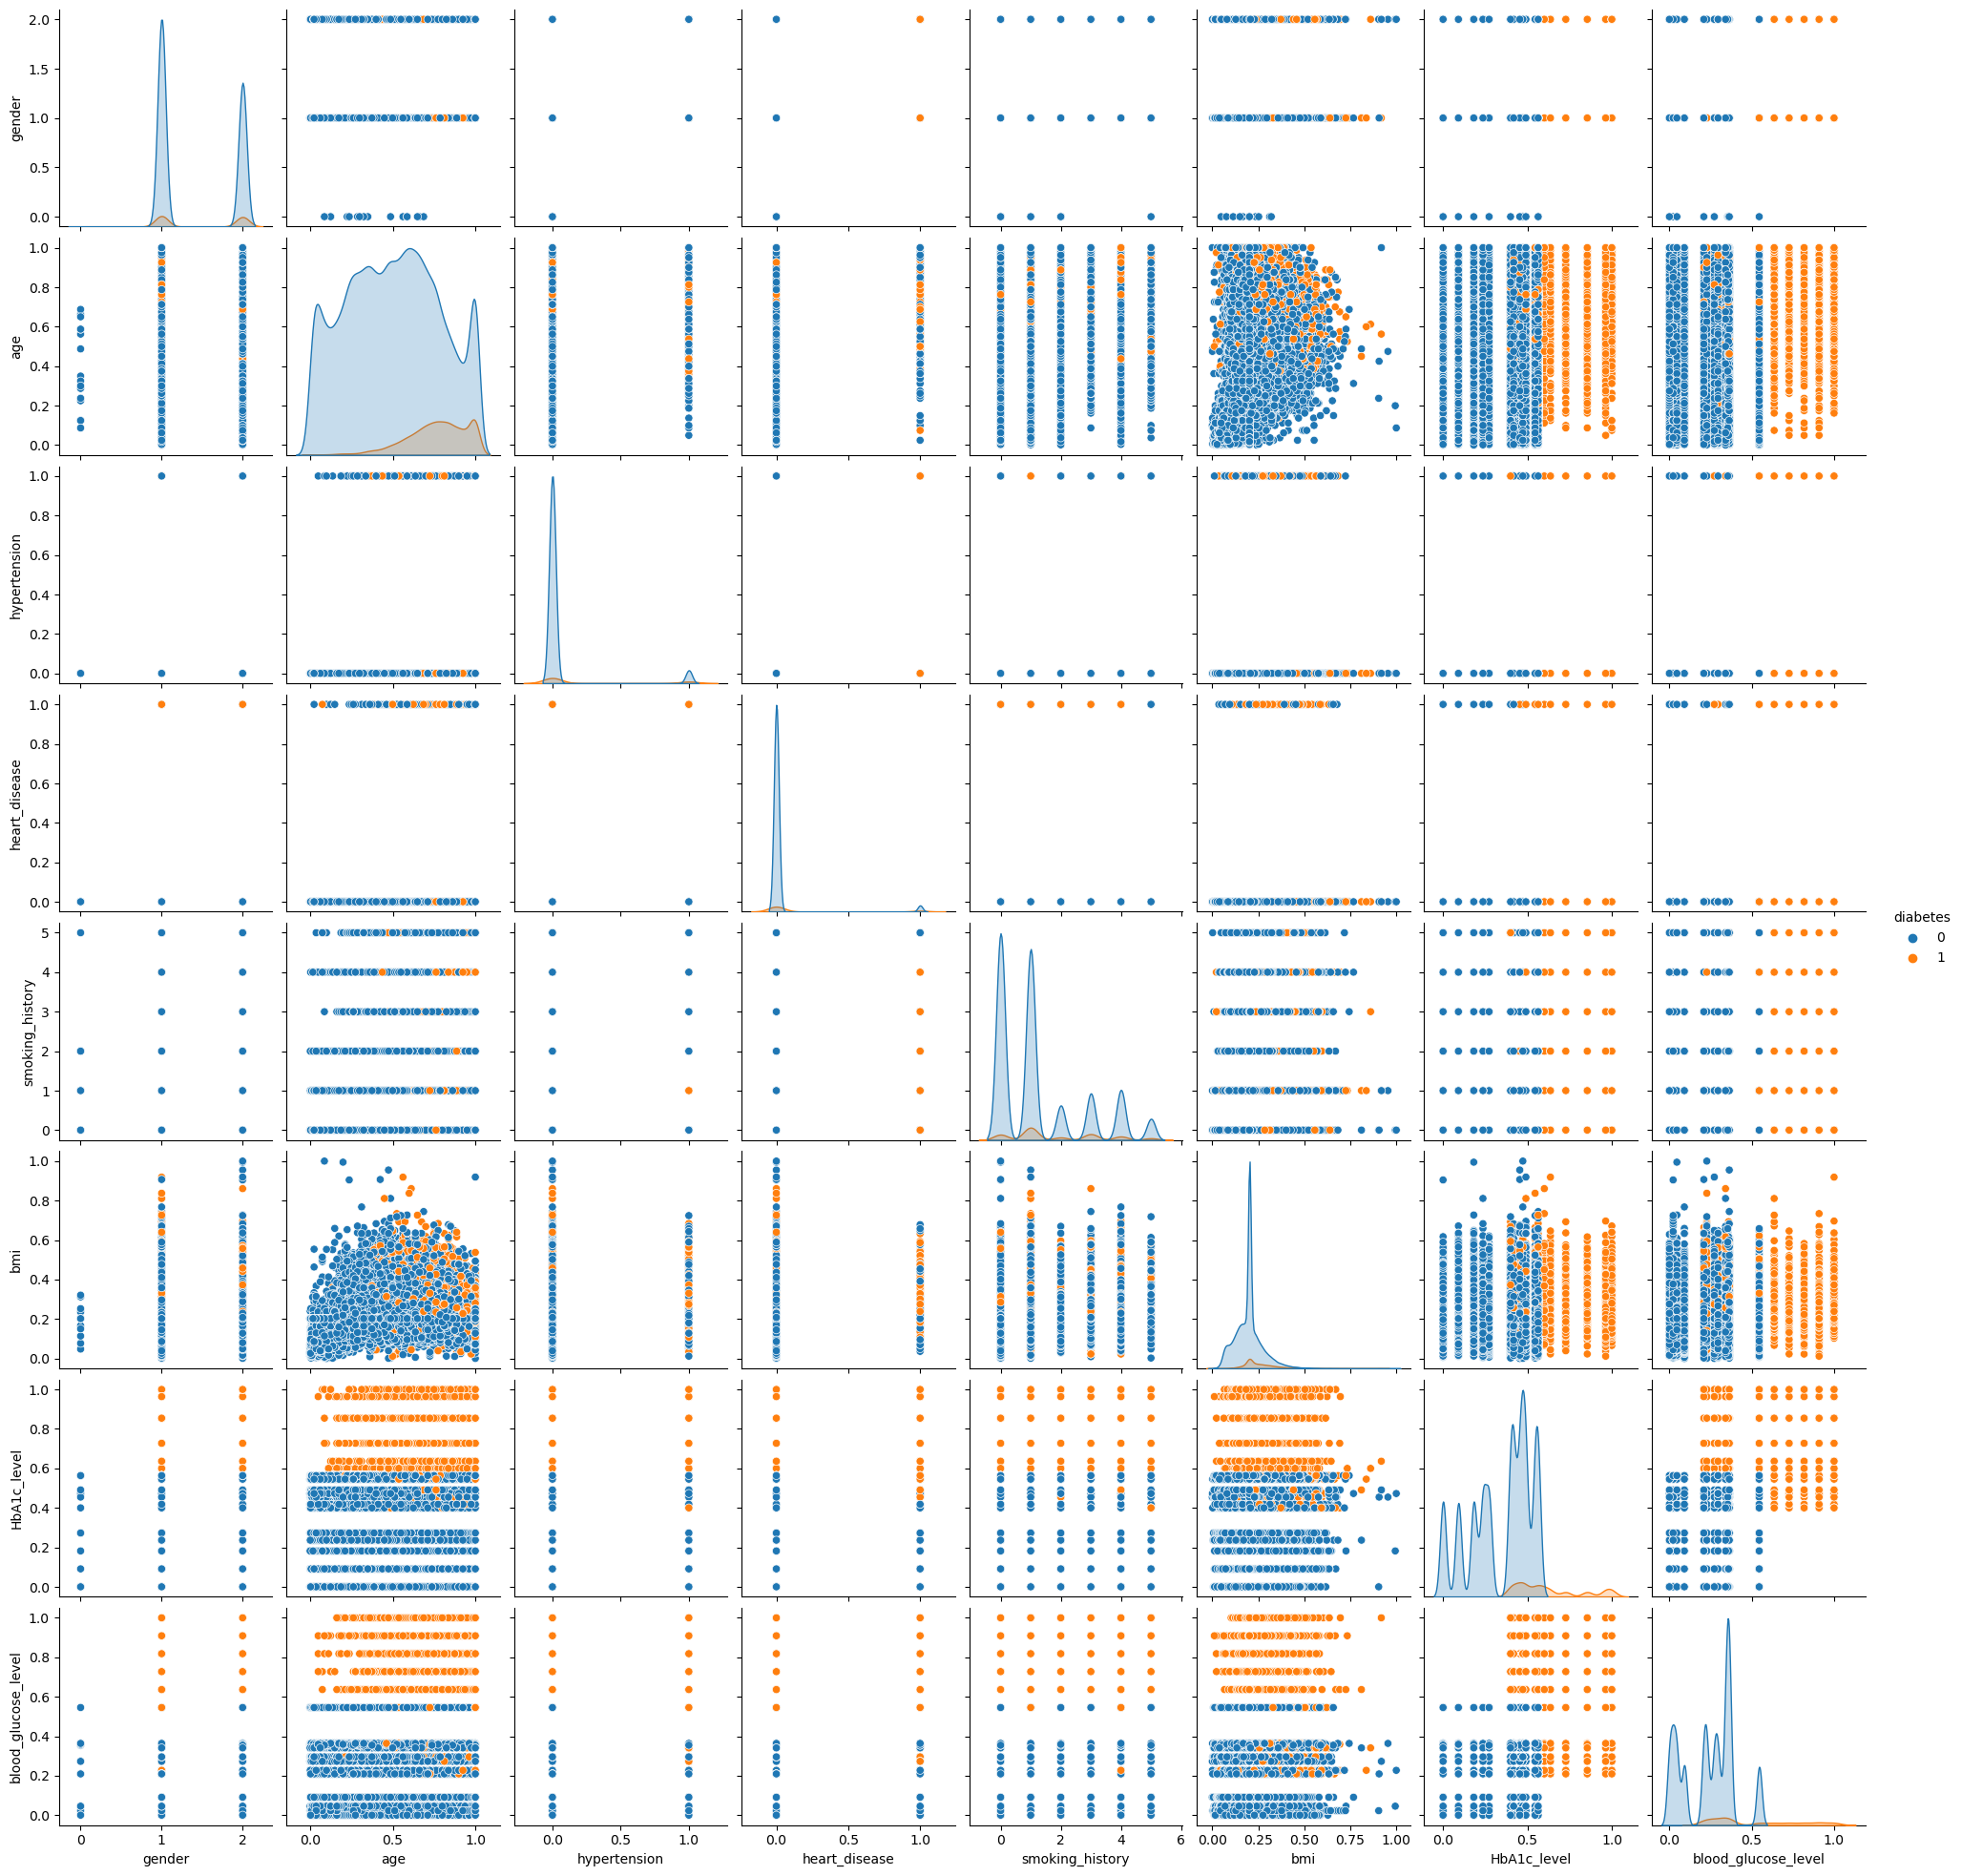

In [ ]:
#Explore relationships between variables
sns.pairplot(data=data_normalized, hue='diabetes')

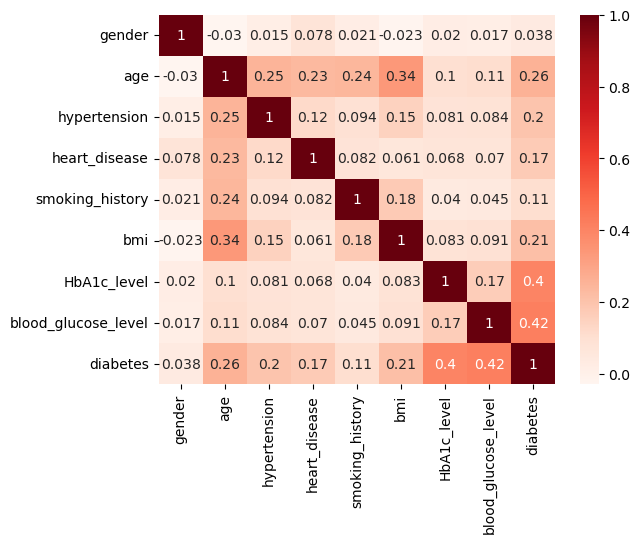

In [ ]:
# Visualize correlations between variables
sns.heatmap(data_normalized.corr(), cmap="Reds", annot = True)
plt.show()

[link text](https://)# Split the Data:

* Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = data_normalized.drop('diabetes', axis=1)
y = data_normalized['diabetes']


# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 8), (20000, 8), (80000,), (20000,))

# Build and Train the Models:

*   List item
*   List item



# Train Decision Tree model


* Use scikit-learn to create a DecisionTree model and train it using the training data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth = 8, random_state=42)

In [ ]:
# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [ ]:
y_scores_dt = dt_classifier.predict_proba(X_test)[:, 1]
y_scores_dt

array([0.00521975, 0.        , 0.        , ..., 0.        , 0.        ,
       0.05055955])

In [ ]:
# Predictions
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
# Evaluating the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Extract the weighted average part for precision, recall, and f1-score
weighted_avg_dt = classification_rep_dt['weighted avg']
precision_dt = weighted_avg_dt['precision']
recall_dt = weighted_avg_dt['recall']
f1_score_dt = weighted_avg_dt['f1-score']

In [ ]:
# Display the results
print(f'Accuracy: {accuracy_dt:.4f}')
print(f'Overall Precision: {precision_dt:.4f}')
print(f'Overall Recall: {recall_dt:.4f}')
print(f'Overall F1-Score: {f1_score_dt:.4f}')

Accuracy: 0.9722
Overall Precision: 0.9727
Overall Recall: 0.9722
Overall F1-Score: 0.9698


# Train A Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Training a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_scores_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_scores_rf

array([0.  , 0.  , 0.  , ..., 0.  , 0.06, 0.02])

In [ ]:
# Predictions
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract the weighted average part for precision, recall, and f1-score
weighted_avg_rf = classification_rep_rf['weighted avg']
precision_rf = weighted_avg_rf['precision']
recall_rf = weighted_avg_rf['recall']
f1_score_rf = weighted_avg_rf['f1-score']

In [ ]:
# Display the results
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Overall Precision: {precision_rf:.4f}')
print(f'Overall Recall: {recall_rf:.4f}')
print(f'Overall F1-Score: {f1_score_rf:.4f}')

Accuracy: 0.9702
Overall Precision: 0.9696
Overall Recall: 0.9702
Overall F1-Score: 0.9681


# Train A Logistic Regression Model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Train Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_scores_lr = lr_classifier.predict_proba(X_test)[:, 1]
y_scores_lr

array([0.00077956, 0.00015811, 0.00138301, ..., 0.00034392, 0.11924824,
       0.00828186])

In [ ]:
# Predict the model
y_pred_lr = lr_classifier.predict(X_test)

In [ ]:
# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# Extract the weighted average part for precision, recall, and f1-score
weighted_avg_lr = classification_rep_lr['weighted avg']
precision_lr = weighted_avg_lr['precision']
recall_lr = weighted_avg_lr['recall']
f1_score_lr = weighted_avg_lr['f1-score']

In [ ]:
# Display the results
print(f'Accuracy: {accuracy_lr:.4f}')
print(f'Overall Precision: {precision_lr:.4f}')
print(f'Overall Recall: {recall_lr:.4f}')
print(f'Overall F1-Score: {f1_score_lr:.4f}')

Accuracy: 0.9592
Overall Precision: 0.9569
Overall Recall: 0.9592
Overall F1-Score: 0.9558


# Train A Support Vektor Machines (SVM) Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Train SVM model
svm_classifier = SVC(kernel = 'linear', probability = True, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
y_scores_svm = svm_classifier.predict_proba(X_test)[:, 1]
y_scores_svm

array([0.00108026, 0.00022171, 0.00084073, ..., 0.0002258 , 0.09946244,
       0.00853615])

In [ ]:
# Predict the model
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
# Evaluat the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Extract the weighted average part for precision, recall, and f1-score
weighted_avg_svm = classification_rep_svm['weighted avg']
precision_svm = weighted_avg_svm['precision']
recall_svm = weighted_avg_svm['recall']
f1_score_svm = weighted_avg_svm['f1-score']

In [ ]:
# Display the results
print(f'Accuracy: {accuracy_svm:.4f}')
print(f'Overall Precision: {precision_svm:.4f}')
print(f'Overall Recall: {recall_svm:.4f}')
print(f'Overall F1-Score: {f1_score_svm:.4f}')

Accuracy: 0.9588
Overall Precision: 0.9575
Overall Recall: 0.9588
Overall F1-Score: 0.9543


# Train A Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize and train the Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)
gbm_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_scores_gbm = gbm_classifier.predict_proba(X_test)[:, 1]
y_scores_gbm

array([0.0043783 , 0.0018786 , 0.00194731, ..., 0.00067009, 0.00666882,
       0.02265955])

In [ ]:
# Predict on the test set
y_pred_gbm = gbm_classifier.predict(X_test)

In [ ]:
# Evaluat the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
classification_rep_gbm = classification_report(y_test, y_pred_gbm, output_dict=True)

# Extract the weighted average part for precision, recall, and f1-score
weighted_avg_gbm = classification_rep_gbm['weighted avg']
precision_gbm = weighted_avg_gbm['precision']
recall_gbm = weighted_avg_gbm['recall']
f1_score_gbm = weighted_avg_gbm['f1-score']

In [ ]:
# Display the results
print(f'Accuracy: {accuracy_gbm:.4f}')
print(f'Overall Precision: {precision_gbm:.4f}')
print(f'Overall Recall: {recall_gbm:.4f}')
print(f'Overall F1-Score: {f1_score_gbm:.4f}')

Accuracy: 0.9722
Overall Precision: 0.9726
Overall Recall: 0.9722
Overall F1-Score: 0.9699


✈# Comparison between Models with AUC_ROC

> Add blockquote



In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
# Assuming you have true labels (y_true) and predicted probabilities (y_scores) from your model
# Example data (replace these with your actual data)

# Calculate ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test.values, y_scores_dt)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test.values, y_scores_rf)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test.values, y_scores_lr)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test.values, y_scores_svm)
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test.values, y_scores_gbm)

# Calculate AUC-ROC
auc_roc_dt = auc(fpr_dt, tpr_dt)
auc_roc_rf = auc(fpr_rf, tpr_rf)
auc_roc_lr = auc(fpr_lr, tpr_lr)
auc_roc_svm = auc(fpr_svm, tpr_svm)
auc_roc_gbm = auc(fpr_gbm, tpr_gbm)


In [ ]:
type(y_test.values)


numpy.ndarray

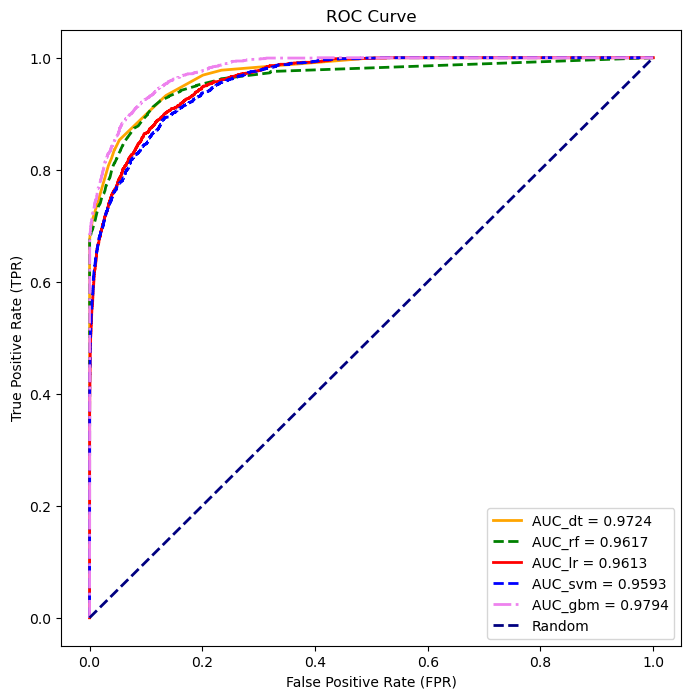

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, color='orange', lw=2, label=f'AUC_dt = {auc_roc_dt:.4f}')
plt.plot(fpr_rf, tpr_rf, color='green', linestyle='--', lw=2, label=f'AUC_rf = {auc_roc_rf:.4f}')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'AUC_lr = {auc_roc_lr:.4f}')
plt.plot(fpr_svm, tpr_svm, color='blue', linestyle='--', lw=2, label=f'AUC_svm = {auc_roc_svm:.4f}')
plt.plot(fpr_gbm, tpr_gbm, color='violet',linestyle='-.', lw=2, label=f'AUC_gbm = {auc_roc_gbm:.4f}')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()